In [1]:
import warnings 
import pandas as pd
import numpy as np
import sys
sys.path.append("..")
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")

In [2]:
from scripts.data_read import read_data

In [3]:
df = read_data("../data/cleaned_data.xlsx")

In [4]:
df_uncleaned = read_data('../data/Week1_challenge_data_source.xlsx')

In [5]:
df =  df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [6]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770,2019-04-25 14:35:31,662,86399.0,2.082014e+14,33664962239,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235,2019-04-25 08:15:48,606,86399.0,2.082019e+14,33681854413,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1,2019-04-25 11:58:13,652,86399.0,2.082003e+14,33760627129,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,86399.0,2.082014e+14,33750343200,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565,2019-04-25 10:40:32,954,86399.0,2.082014e+14,33699795932,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814,569138589.0


In [7]:
for i,j in enumerate(df_uncleaned.columns):
    print(i,j)

0 Bearer Id
1 Start
2 Start ms
3 End
4 End ms
5 Dur. (ms)
6 IMSI
7 MSISDN/Number
8 IMEI
9 Last Location Name
10 Avg RTT DL (ms)
11 Avg RTT UL (ms)
12 Avg Bearer TP DL (kbps)
13 Avg Bearer TP UL (kbps)
14 TCP DL Retrans. Vol (Bytes)
15 TCP UL Retrans. Vol (Bytes)
16 DL TP < 50 Kbps (%)
17 50 Kbps < DL TP < 250 Kbps (%)
18 250 Kbps < DL TP < 1 Mbps (%)
19 DL TP > 1 Mbps (%)
20 UL TP < 10 Kbps (%)
21 10 Kbps < UL TP < 50 Kbps (%)
22 50 Kbps < UL TP < 300 Kbps (%)
23 UL TP > 300 Kbps (%)
24 HTTP DL (Bytes)
25 HTTP UL (Bytes)
26 Activity Duration DL (ms)
27 Activity Duration UL (ms)
28 Dur. (ms).1
29 Handset Manufacturer
30 Handset Type
31 Nb of sec with 125000B < Vol DL
32 Nb of sec with 1250B < Vol UL < 6250B
33 Nb of sec with 31250B < Vol DL < 125000B
34 Nb of sec with 37500B < Vol UL
35 Nb of sec with 6250B < Vol DL < 31250B
36 Nb of sec with 6250B < Vol UL < 37500B
37 Nb of sec with Vol DL < 6250B
38 Nb of sec with Vol UL < 1250B
39 Social Media DL (Bytes)
40 Social Media UL (Bytes)
41

In [8]:
#add tcp rows to the cleaned dataset 
df['TCP DL Retrans. Vol (Bytes)'] = df_uncleaned['TCP DL Retrans. Vol (Bytes)']
df['TCP UL Retrans. Vol (Bytes)'] = df_uncleaned['TCP UL Retrans. Vol (Bytes)']

In [9]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770,2019-04-25 14:35:31,662,86399.000000,2.082014e+14,33664962239,3.552121e+13,9164566995485190,...,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741,308879636.0,NaN,NaN
1,13114483482878900224,2019-04-09 13:04:04,235,2019-04-25 08:15:48,606,86399.000000,2.082019e+14,33681854413,3.579401e+13,L77566A,...,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391,653384965.0,NaN,NaN
2,13114483484080500736,2019-04-09 17:42:11,1,2019-04-25 11:58:13,652,86399.000000,2.082003e+14,33760627129,3.528151e+13,D42335A,...,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638,279807335.0,NaN,NaN
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,86399.000000,2.082014e+14,33750343200,3.535661e+13,T21824A,...,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218,846028530.0,NaN,NaN
4,13114483499480700928,2019-04-12 20:10:23,565,2019-04-25 10:40:32,954,86399.000000,2.082014e+14,33699795932,3.540701e+13,D88865A,...,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814,569138589.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451,2019-04-30 06:02:33,214,81230.000000,2.082015e+14,33650688697,3.548311e+13,D20434A,...,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851,574175259.0,NaN,NaN
149997,7349883264234609664,2019-04-29 07:28:42,483,2019-04-30 10:41:33,187,97970.000000,2.082019e+14,33663449963,3.566051e+13,D10223C,...,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081,666648844.0,NaN,NaN
149998,13114483573367300096,2019-04-29 07:28:43,283,2019-04-30 10:46:12,810,98249.000000,2.082017e+14,33621890103,3.572121e+13,T51102A,...,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224,592786405.0,NaN,NaN
149999,13114483573367300096,2019-04-29 07:28:43,696,2019-04-30 10:40:34,327,97910.000000,2.082015e+14,33619622058,8.618620e+13,L88342B,...,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096,371895920.0,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150001 non-null  object        
 1   Start                           150001 non-null  datetime64[ns]
 2   Start ms                        150001 non-null  int64         
 3   End                             150001 non-null  datetime64[ns]
 4   End ms                          150001 non-null  int64         
 5   Dur. (ms)                       150001 non-null  float64       
 6   IMSI                            150001 non-null  float64       
 7   MSISDN/Number                   150001 non-null  int64         
 8   IMEI                            150001 non-null  float64       
 9   Last Location Name              150001 non-null  object        
 10  Avg RTT DL (ms)                 150001 non-null  float64

In [11]:
#filling missing values in added column with mean
for i in df.iloc[:,-2:].columns:
    df[i].fillna(df[i].mean(),inplace=True)

In [12]:
df.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [13]:
#create columns
df['Average TCP retransmission'] = df['TCP DL Retrans. Vol (Bytes)']/1000 + df['TCP UL Retrans. Vol (Bytes)']/1000
df['Average RTT'] = df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']
df['Average throughput'] = df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']

In [14]:
for i,j in enumerate(df.columns):
    print(i,j)

0 Bearer Id
1 Start
2 Start ms
3 End
4 End ms
5 Dur. (ms)
6 IMSI
7 MSISDN/Number
8 IMEI
9 Last Location Name
10 Avg RTT DL (ms)
11 Avg RTT UL (ms)
12 Avg Bearer TP DL (kbps)
13 Avg Bearer TP UL (kbps)
14 DL TP < 50 Kbps (%)
15 50 Kbps < DL TP < 250 Kbps (%)
16 250 Kbps < DL TP < 1 Mbps (%)
17 DL TP > 1 Mbps (%)
18 UL TP < 10 Kbps (%)
19 10 Kbps < UL TP < 50 Kbps (%)
20 50 Kbps < UL TP < 300 Kbps (%)
21 UL TP > 300 Kbps (%)
22 Activity Duration DL (ms)
23 Activity Duration UL (ms)
24 Dur. (ms).1
25 Handset Manufacturer
26 Handset Type
27 Nb of sec with Vol DL < 6250B
28 Nb of sec with Vol UL < 1250B
29 Social Media DL (Bytes)
30 Social Media UL (Bytes)
31 Google DL (Bytes)
32 Google UL (Bytes)
33 Email DL (Bytes)
34 Email UL (Bytes)
35 Youtube DL (Bytes)
36 Youtube UL (Bytes)
37 Netflix DL (Bytes)
38 Netflix UL (Bytes)
39 Gaming DL (Bytes)
40 Gaming UL (Bytes)
41 Other DL (Bytes)
42 Other UL (Bytes)
43 Total UL (Bytes)
44 Total DL (Bytes)
45 TCP DL Retrans. Vol (Bytes)
46 TCP UL Retrans

In [15]:
#slicing usefull data 
df_experience = df.iloc[:,np.r_[7,26,47:50]]
df_experience

,MSISDN/Number,Handset Type,Average TCP retransmission,Average RTT,Average throughput
0,33664962239,Samsung Galaxy A5 Sm-A520F,21569.572935,47.000000,67.000000
1,33681854413,Samsung Galaxy J5 (Sm-J530),21569.572935,70.000000,42.000000
2,33760627129,Samsung Galaxy A8 (2018),21569.572935,127.458589,15.000000
3,33750343200,undefined,21569.572935,127.458589,88.000000
4,33699795932,Samsung Sm-G390F,21569.572935,127.458589,15.000000
...,...,...,...,...,...
149996,33650688697,Apple iPhone 8 Plus (A1897),21569.572935,32.000000,117.000000
149997,33663449963,Apple iPhone Se (A1723),21569.572935,29.000000,77.000000
149998,33621890103,Apple iPhone Xs (A2097),21569.572935,49.000000,90.000000
149999,33619622058,Huawei Fig-Lx1,21569.572935,42.000000,71.000000


###### aggregation per customer 

In [16]:
df_aggregated = df_experience.groupby('MSISDN/Number').agg({'Average TCP retransmission':'sum','Average RTT':'sum','Average throughput':'sum'})

#### top 10 

In [17]:
for i,j in zip(np.arange(0,4).tolist(),df_aggregated.columns):
    print(df_aggregated.iloc[:,i:i+1].sort_values(by=j,ascending=False).head(10))
    print('*'*50)
    

               Average TCP retransmission
MSISDN/Number                            
33663797508                  1.204684e+08
33667725464                  8.354209e+06
33659084281                  7.941860e+06
33660977522                  7.374899e+06
33761284050                  6.043978e+06
33762644658                  5.879989e+06
33650658056                  5.593366e+06
33663180885                  5.566929e+06
33669054076                  5.195785e+06
33763572381                  5.179459e+06
**************************************************
                 Average RTT
MSISDN/Number               
33663797508    538838.151851
33760536639      1736.585890
33658263267      1606.458589
33662840755      1481.375767
33614892860      1355.751534
33626320676      1314.668712
33666106302      1257.292945
33664693736      1147.127301
33604515716      1118.834356
33763859490      1092.000000
**************************************************
               Average throughput
MSISDN/Numbe

##### bottom 10

In [18]:
for i,j in zip(np.arange(0,4).tolist(),df_aggregated.columns):
    print(df_aggregated.iloc[:,i:i+1].sort_values(by=j,ascending=False).tail(10))
    print('*'*50)

               Average TCP retransmission
MSISDN/Number                            
33676396209                         0.208
33699042279                         0.189
33699694715                         0.182
33679366089                         0.179
33650681239                         0.176
33607833304                         0.143
33626357513                         0.134
33762062356                         0.129
33614777138                         0.128
33650128412                         0.097
**************************************************
               Average RTT
MSISDN/Number             
33672196893            9.0
33610846366            9.0
33647679481            8.0
33667477967            7.0
33668619895            6.0
33659493541            5.0
33695045499            4.0
33660204450            2.0
33661575382            0.0
33652982188            0.0
**************************************************
               Average throughput
MSISDN/Number                    
33

###### aggregation per  Handset Type

###### top 10 

In [19]:
df_aggregated_ = df_experience.groupby('Handset Type').agg({'Average throughput':'sum'})

In [20]:
df_aggregated_.sort_values(by='Average throughput',ascending=False).head(10)

,Average throughput
Handset Type,
Huawei B528S-23A,5.602127e+08
undefined,5.453192e+07
Huawei E5180,5.336343e+07
Apple iPhone 6 (A1586),5.255225e+07
Apple iPhone 6S (A1688),4.513501e+07
Samsung Galaxy S8 (Sm-G950F),4.148994e+07
Apple iPhone 7 (A1778),4.024695e+07
Apple iPhone 8 (A1905),2.833523e+07
Apple iPhone Xr (A2105),2.529907e+07


In [21]:
df_aggregated__ = df_experience.groupby('Handset Type').agg({'Average TCP retransmission':'sum'})

In [22]:
df_aggregated__.sort_values(by='Average TCP retransmission',ascending=False).head(10)

,Average TCP retransmission
Handset Type,
Huawei B528S-23A,1.100867e+09
Apple iPhone 6S (A1688),1.717744e+08
Apple iPhone 6 (A1586),1.523796e+08
undefined,1.472596e+08
Apple iPhone 7 (A1778),1.053158e+08
Apple iPhone Se (A1723),9.210993e+07
Apple iPhone 8 (A1905),8.697379e+07
Apple iPhone Xr (A2105),8.410857e+07
Samsung Galaxy S8 (Sm-G950F),6.927049e+07


###### bottom 10

In [23]:
df_aggregated__.sort_values(by='Average TCP retransmission',ascending=False).tail(10)

,Average TCP retransmission
Handset Type,
Asustek Asus Zenfone Zoom Zx551Ml,3.912
Tct Mobile Suzho. Alcatel Onetouch Pop C2,3.406
Lenovo Moto E,3.289
Htc 2Q6E100,2.894
Samsung Gt-P5220,2.400
Oppo A37F,2.377
Lenovo Moto X Play,1.817
Gotron (Hk) Elec. Armor X,1.500
Samsung Galaxy Note 8 (Sm-N9500),0.418


In [24]:
df_aggregated_.sort_values(by='Average throughput',ascending=False).tail(10)

,Average throughput
Handset Type,
Rim 8520,3.0
Concox Informati. Gt06,3.0
Rim Blackberry 9360,3.0
Test IMEI,2.0
Concox Informati. Concox Gt06 Gt06N Tr06,2.0
Samsung Gt-S6310N,2.0
Quectel Wireless. Quectel Ec21-E,2.0
Quectel Wireless. Quectel Ec25-E,1.0
Wct Uno,0.0


##### clustering  

In [25]:
df_aggregated

,Average TCP retransmission,Average RTT,Average throughput
MSISDN/Number,,,
33601001722,21569.572935,46.000000,76.0
33601001754,21569.572935,31.000000,99.0
33601002511,21569.572935,127.458589,97.0
33601007832,760.724665,84.000000,248.0
33601008617,30940.404935,119.000000,40498.0
...,...,...,...
33769465979,20999.187270,162.000000,75596.0
33769467096,21569.572935,38.000000,394.0
33769467406,21569.572935,34.000000,63.0


In [26]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_aggregated)

In [27]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [28]:
df_aggregated['clusters'] = kmeans.labels_

In [29]:
df_aggregated

,Average TCP retransmission,Average RTT,Average throughput,clusters
MSISDN/Number,,,,
33601001722,21569.572935,46.000000,76.0,2
33601001754,21569.572935,31.000000,99.0,2
33601002511,21569.572935,127.458589,97.0,2
33601007832,760.724665,84.000000,248.0,2
33601008617,30940.404935,119.000000,40498.0,2
...,...,...,...,...
33769465979,20999.187270,162.000000,75596.0,2
33769467096,21569.572935,38.000000,394.0,2
33769467406,21569.572935,34.000000,63.0,2


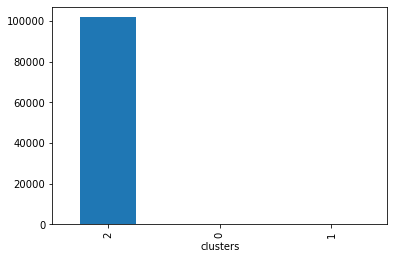

In [30]:
df_aggregated['clusters'].value_counts().plot(kind='bar')
plt.xlabel('clusters');

In [31]:
df_experience.to_csv('../data/experience_data.csv',index=False)